In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart-disease-dataset/heart.csv
/kaggle/input/heart-disease-uci/heart.csv


In [2]:
heart = pd.read_csv("../input/heart-disease-dataset/heart.csv")
data = heart.values

In [3]:
train_y = data[:200,-1]
train_X = data[:200,:-1]

test_X = data[200:,:-1]
test_y = data[200:,-1]

print(test_X)

train_X1 = np.hstack((np.transpose(np.array([train_X[:,0]])),train_X[:,2:6]))
train_X2 = np.hstack((np.transpose(np.array([train_X[:,7]])), train_X[:,9: ]))

train_X = np.hstack((train_X1,train_X2))

test_X1 = np.hstack((np.transpose(np.array([test_X[:,0]])),test_X[:,2:6]))
test_X2 = np.hstack((np.transpose(np.array([test_X[:,7]])), test_X[:,9: ]))

test_X = np.hstack((test_X1,test_X2))

print(test_X)


[[62.  0.  0. ...  2.  0.  2.]
 [34.  1.  3. ...  2.  0.  2.]
 [52.  1.  3. ...  1.  0.  3.]
 ...
 [47.  1.  0. ...  1.  1.  2.]
 [50.  0.  0. ...  2.  0.  2.]
 [54.  1.  0. ...  1.  1.  3.]]
[[ 62.   0. 124. ...   2.   0.   2.]
 [ 34.   3. 118. ...   2.   0.   2.]
 [ 52.   3. 152. ...   1.   0.   3.]
 ...
 [ 47.   0. 110. ...   1.   1.   2.]
 [ 50.   0. 110. ...   2.   0.   2.]
 [ 54.   0. 120. ...   1.   1.   3.]]


In [4]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import mean_squared_error

num_of_rows = int(train_X.shape[0]/2)

fit = LR(penalty='l2', 
         dual=False, 
         tol=0.00000001, 
         C=1, 
         fit_intercept=True, 
         intercept_scaling=1, 
         class_weight=None, 
         random_state=None, 
         solver='liblinear', 
         max_iter=100000, 
         multi_class='auto', 
         verbose=0, 
         warm_start=False, 
         n_jobs=None, 
         l1_ratio=None).fit(train_X,train_y)

print("Coefficients: ",fit.coef_)
print("Intercept: ",fit.intercept_)

#print(fit.score(train_X,train_y))
print("Accuracy on test data: ",fit.score(test_X,test_y))

pred = fit.predict_proba(test_X)

pred = pred[:,1]

for i in range(0,len(pred)):
    if(pred[i]>=0.5):
        pred[i] = 1
    else:
        pred[i] = 0

#print("Prediction on test data: ",pred)

true_positive = 0
false_positive = 0
true_negative = 0
false_negative = 0

for i in range(0,len(pred)):
    if(test_y[i]==1):
        if(pred[i]==test_y[i]):
            true_positive += 1
        else:
            false_negative += 1
    else:
        if(pred[i]==test_y[i]):
            true_negative += 1
        else:
            false_positive += 1

print("true positives: ",true_positive)
print("false positives: ",false_positive)
print("true negatives: ",true_negative)
print("false negatives: ",false_negative)

print("false positive rate: ",false_positive/(false_positive+true_negative))
print("false negative rate: ",false_negative/(true_positive+false_negative))

print("mean squared error: ",mean_squared_error(pred,test_y))

Coefficients:  [[ 0.01327327  1.41799215 -0.02944143  0.00243287 -0.51404024  0.02154936
  -0.94364028  0.99541321 -1.07580787 -1.0138451 ]]
Intercept:  [0.39493545]
Accuracy on test data:  0.7927272727272727
true positives:  341
false positives:  85
true negatives:  313
false negatives:  86
false positive rate:  0.2135678391959799
false negative rate:  0.20140515222482436
mean squared error:  0.20727272727272728


In [5]:
c_range = np.linspace(0.1,5,num=100)

fpr = np.zeros(100)
tpr = np.zeros(100)

for j in range(0,100):
    fit = LR(penalty='l2', 
         dual=False, 
         tol=0.001, 
         C=c_range[j], 
         fit_intercept=True, 
         intercept_scaling=1, 
         class_weight=None, 
         random_state=None, 
         solver='lbfgs', 
         max_iter=100000, 
         multi_class='auto', 
         verbose=0, 
         warm_start=False, 
         n_jobs=None, 
         l1_ratio=None).fit(train_X,train_y)
    
    pred = fit.predict_proba(test_X)

    pred = pred[:,1]

    for i in range(0,len(pred)):
        if(pred[i]>=0.5):
            pred[i] = 1
        else:
            pred[i] = 0
    
    true_positive = 0
    false_positive = 0
    true_negative = 0
    false_negative = 0

    for i in range(0,len(pred)):
        if(test_y[i]==1):
            if(pred[i]==test_y[i]):
                true_positive += 1
            else:
                false_negative += 1
        else:
            if(pred[i]==test_y[i]):
                true_negative += 1
            else:
                false_positive += 1
                
    fpr[j] = false_positive/(false_positive+true_negative)
    tpr[j] = true_positive/(true_positive+false_negative)

In [23]:
c_range = np.linspace(0.1,5,num=100)

fpr = np.zeros(100)
fnr = np.zeros(100)
acc = np.zeros(100)

for j in range(0,100):
    fit = LR(penalty='l2', 
         dual=False, 
         tol=0.001, 
         C=c_range[j], 
         fit_intercept=True, 
         intercept_scaling=1, 
         class_weight=None, 
         random_state=None, 
         solver='lbfgs', 
         max_iter=100000, 
         multi_class='auto', 
         verbose=0, 
         warm_start=False, 
         n_jobs=None, 
         l1_ratio=None).fit(train_X,train_y)
    
    pred = fit.predict_proba(test_X)

    pred = pred[:,1]

    for i in range(0,len(pred)):
        if(pred[i]>=0.5):
            pred[i] = 1
        else:
            pred[i] = 0
    
    true_positive = 0
    false_positive = 0
    true_negative = 0
    false_negative = 0

    for i in range(0,len(pred)):
        if(test_y[i]==1):
            if(pred[i]==test_y[i]):
                true_positive += 1
            else:
                false_negative += 1
        else:
            if(pred[i]==test_y[i]):
                true_negative += 1
            else:
                false_positive += 1
                
    fpr[j] = false_positive/(false_positive+true_negative)
    #fnr[j] = false_negative/(true_positive+false_negative)
    acc[j] = fit.score(test_X,test_y)


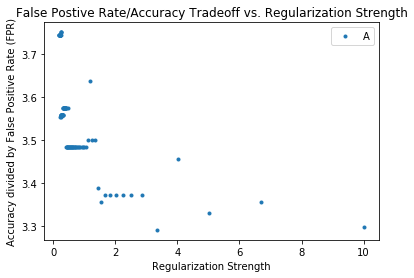

In [31]:
import matplotlib.pyplot as plt

alpha = 1/c_range

#plt.plot(c_range,fpr,'.')
plt.plot(alpha,acc/fpr,'.')
plt.title("False Postive Rate/Accuracy Tradeoff vs. Regularization Strength")
plt.xlabel("Regularization Strength")
plt.ylabel("Accuracy divided by False Positive Rate (FPR)")
plt.show()

In [16]:
print(c_range[0])

0.1
